# Predicting Hotel Cancellations

## Executive Summary
This is an entry to a past competition by [DataCamp](https://app.datacamp.com/) that is not judged. The task is to support a hotel to increase revenue from their room bookings and reduce the number of cancellations. I use this as an exercise to build different machine learning models and choose methodology described below.

#### Exploratory Data Analysis
I briefly inspect the data types and non-null count in the data. I look at simple visualizations in order to gain an understanding of the data. 

#### Feature Engineering
I encode non-numerical variables and adjust the data types if necessary. There is a small amount of missing data (less than 7% of all) in most of the columns. The reasons for this are unknown so I use imputing to replace missing values. Afterwards, I scale all the numerical values in order to ensure that they lie between the same values. This will contribute to accurate and efficient model training and performance while reducing potential biases and inconsistencies that may arise from variations in their values. In addition, I convert the columns containing categorical data using one-hot encoding so that I can later use the new numerical data in the machine learning models. Finally, I look at the correlation, mutual information and SelectKBest in order to grasp the relevance of each feature. 

#### Machine Learning Models
I build the following types of models in order to identify which are the most important features influencing whether a booking will be canceled.
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest
4. Neural Network

I evaluate the models and find that the random forest and decision tree models perform similarly in terms of accuracy (0.86 and 0.87), as well as precision, recall and F1 scores (all between 0.77 and 0.80). They also perform  better than the logistic regression model (accuracy 0.80). Lastly, I build a simple neural network which has good accuracy (0.86). I chose not to spend more time on tuning the models but instead recommend focusing future efforts on improving the decision tree and random fores models. They perform very well in terms of all the scores and are also easier to interpret.

#### Conclusion
The different feature selection techniques and machine learning models show somewhat different relevance of the features. However, almost all show that lead_time and avg_price_per_room seem to be the most important factors for determining whether a booked room gets canceled. Other features that might be very relevant are no_of_special_requests and no_of_week_nights. This project could be used to build initial hypothesis about ways to reduce cancelations of bookings. Potential next steps are collecting further information about the missing data, adding more data to the models, tweaking further the models and of course testing the hypotheses.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Exploratory Data Analysis

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore') # added after I finalized the project

In [2]:
# Load data
hotel = pd.read_csv("data/hotel_bookings.csv")

In [3]:
# Inspect the first five rows in the data
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [4]:
# Inspect the data types and non-null count in the data
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [5]:
# Inspect missing data
print(hotel.isna().sum())

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64


There is missing data in almost all the columns. The reasons for this are unknown. I will look into it further when in the 'Feature Engineering' section.

In [6]:
# Separate the features according to numerical and categorical data
columns_num = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
columns_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

I plot the potential features in order to visualize the data before I begin with feature engineering.

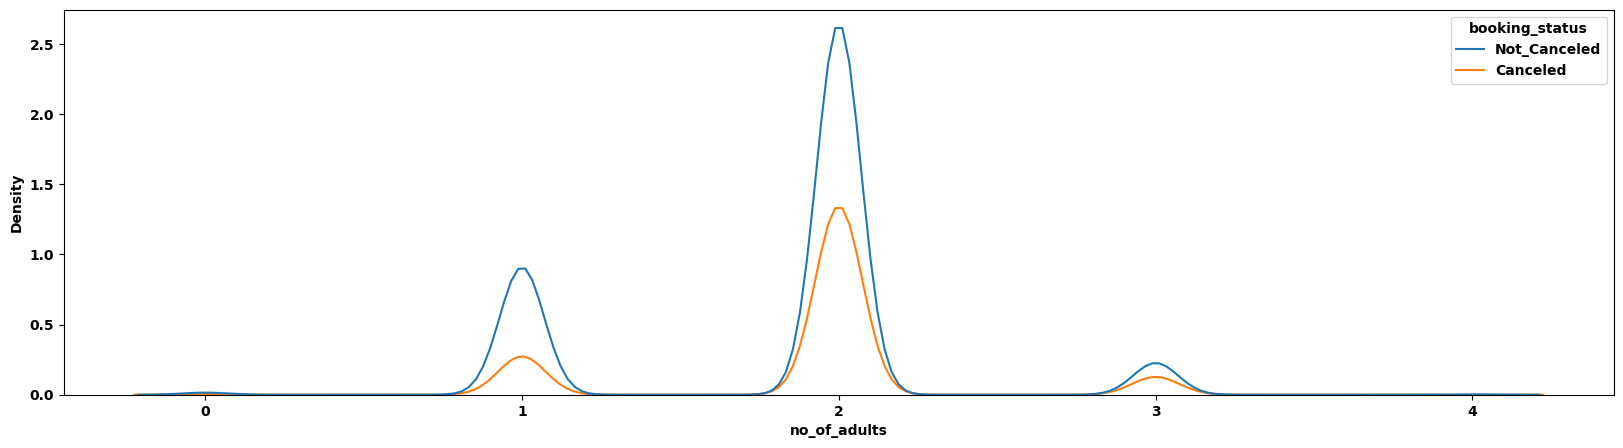

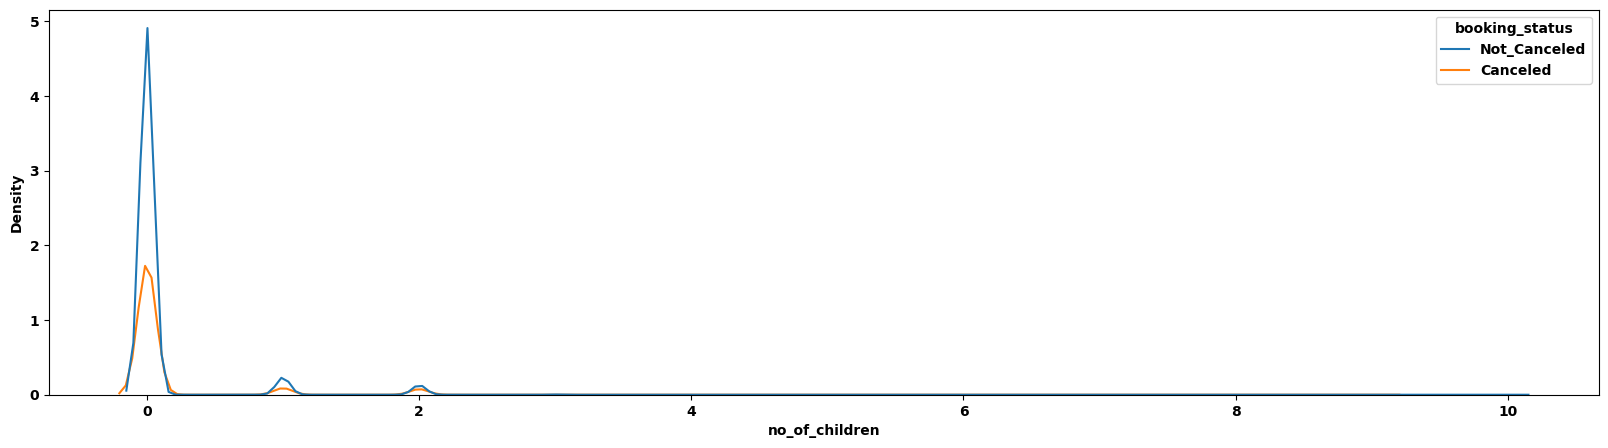

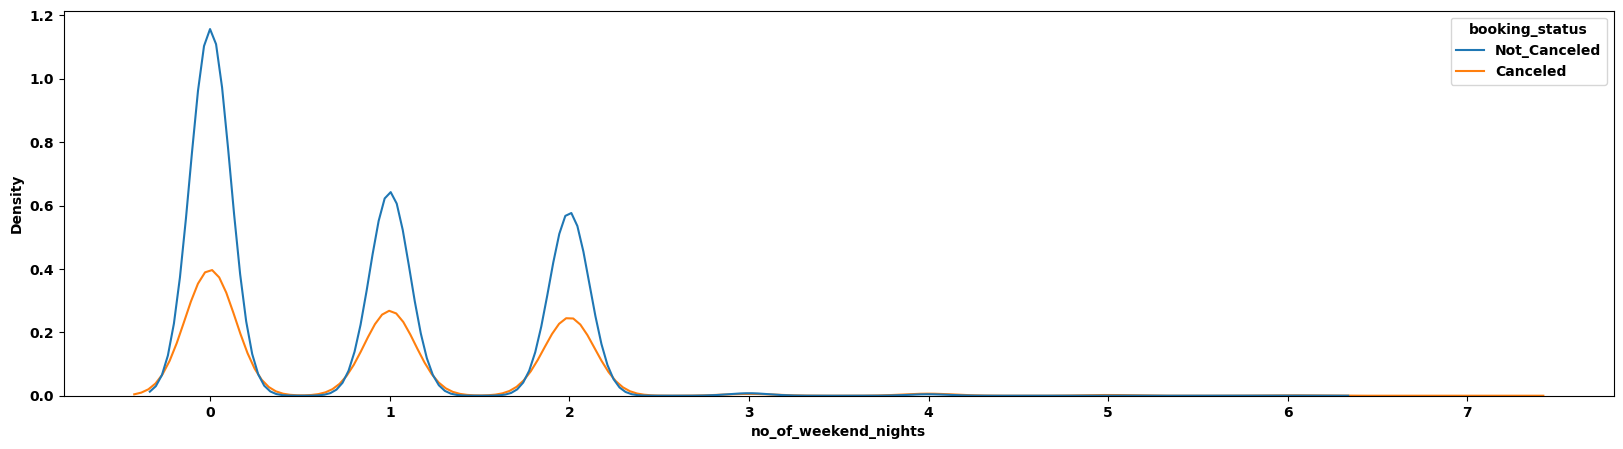

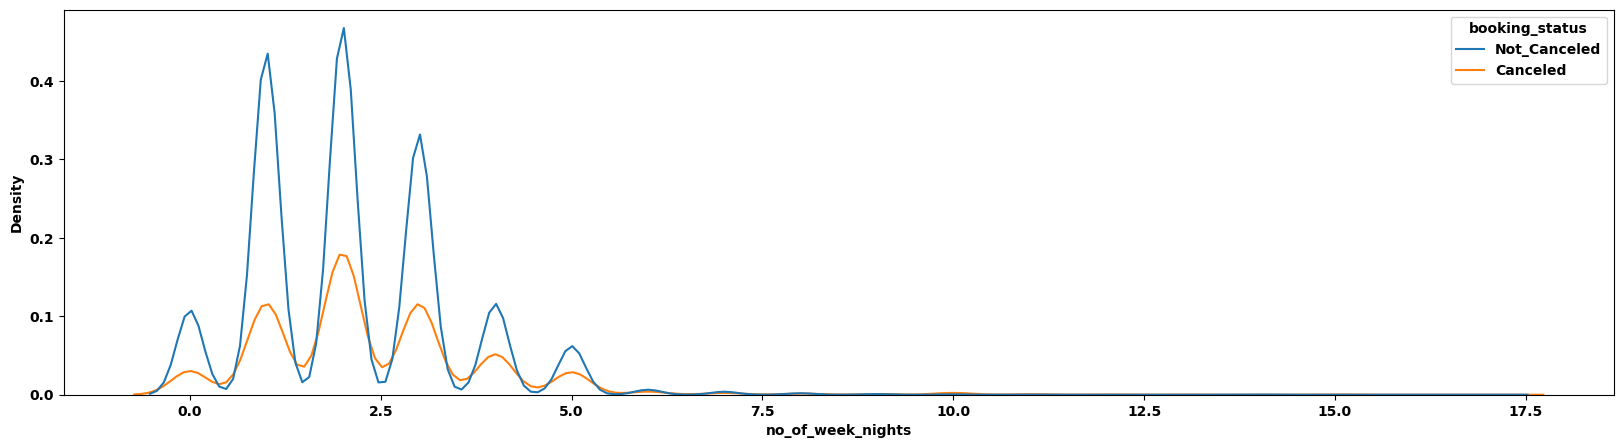

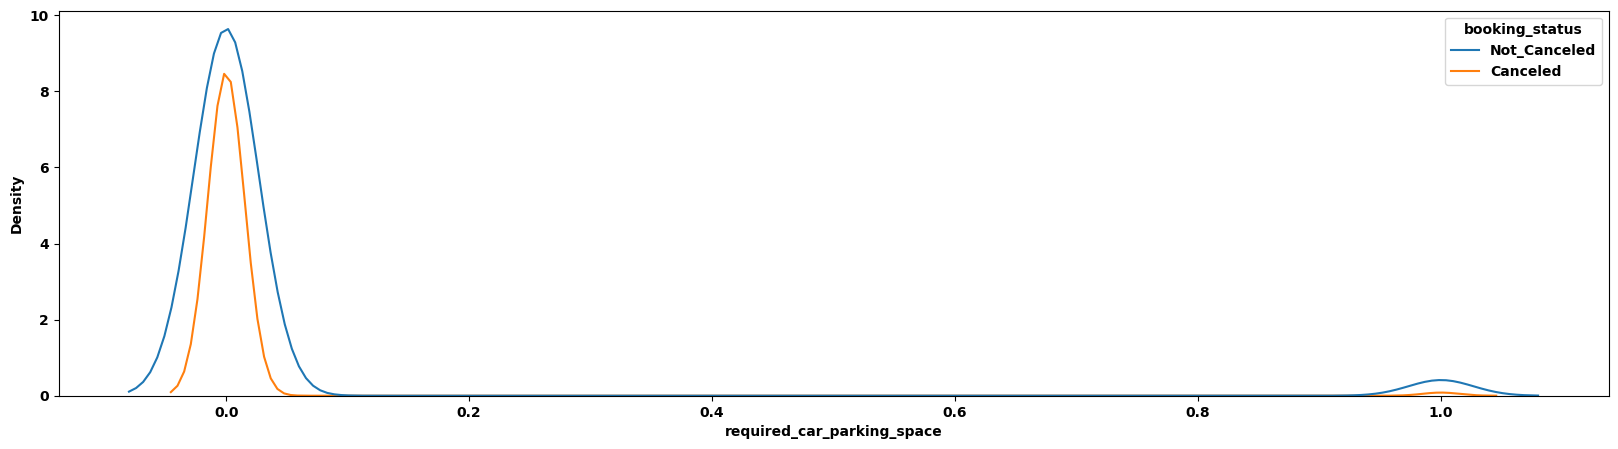

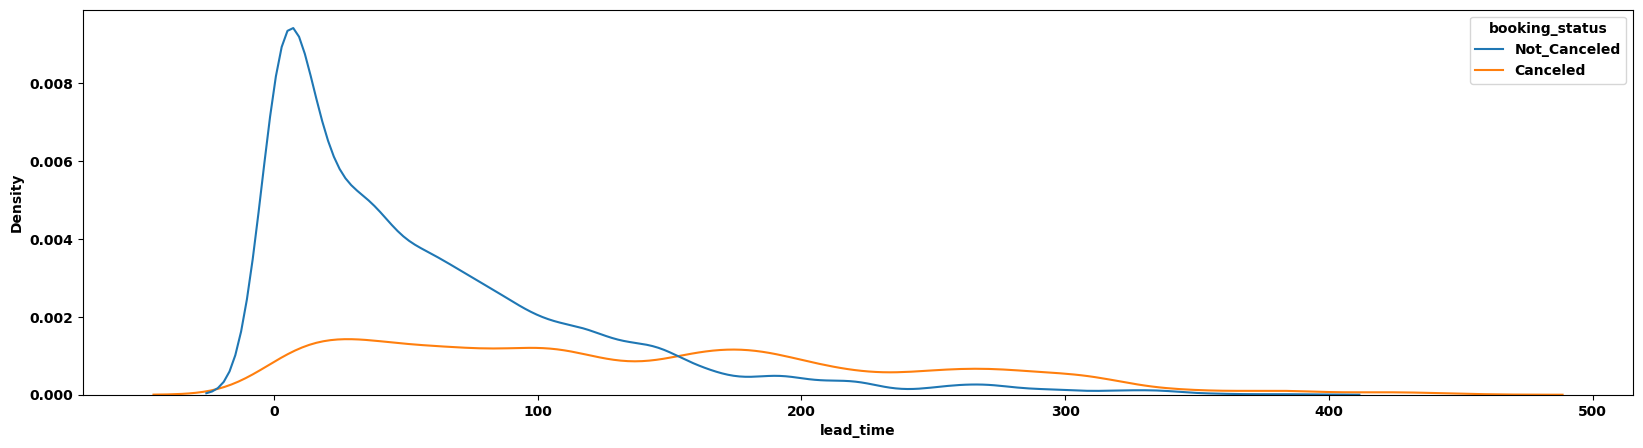

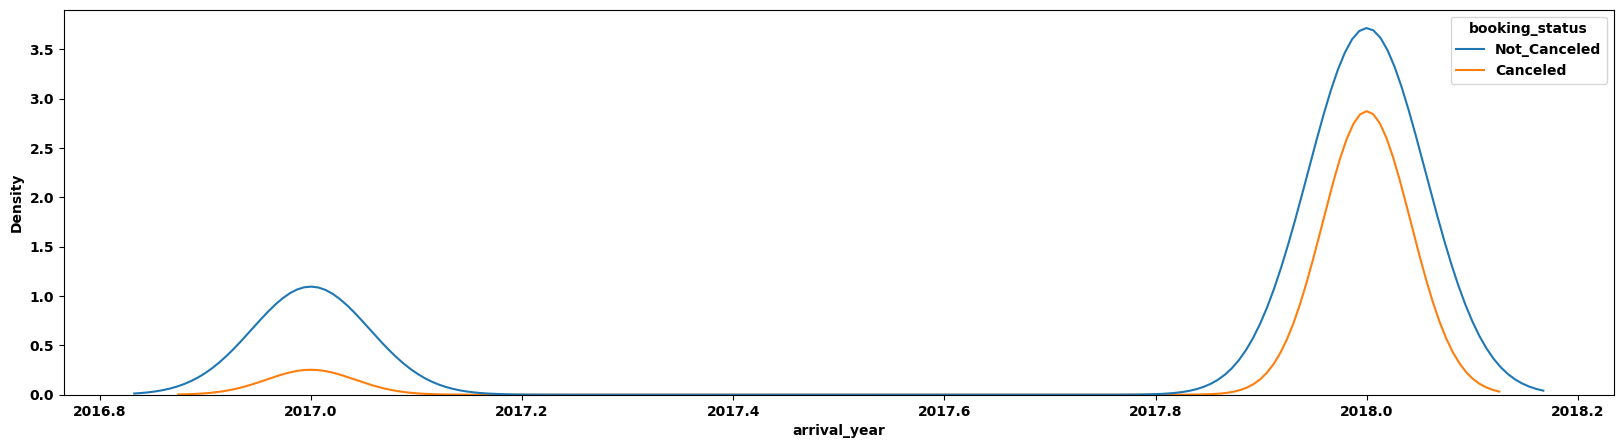

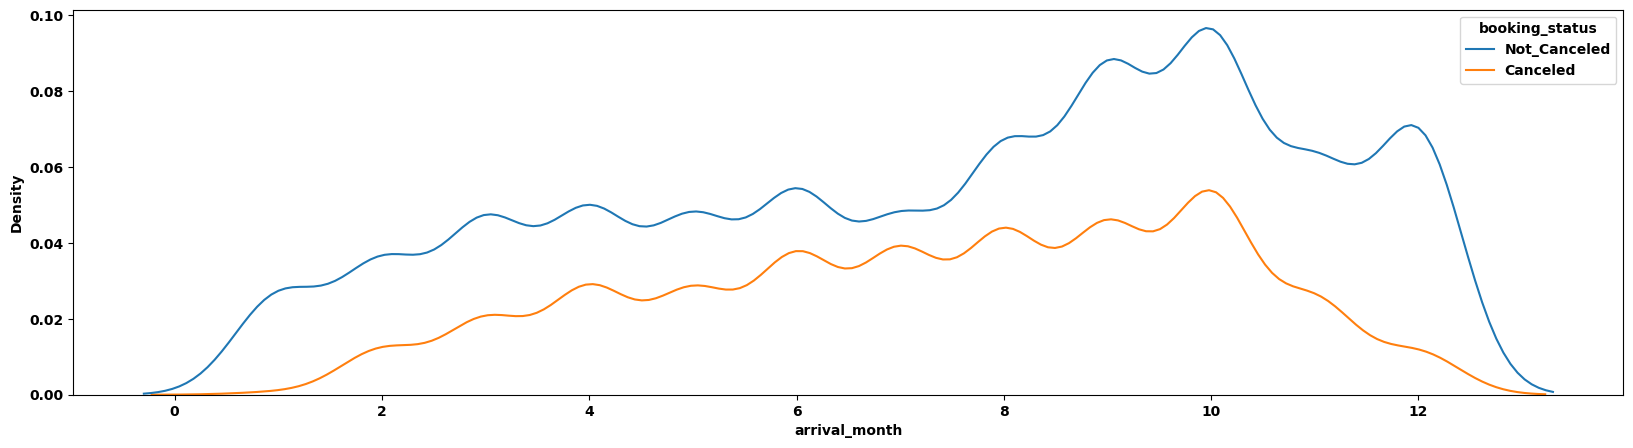

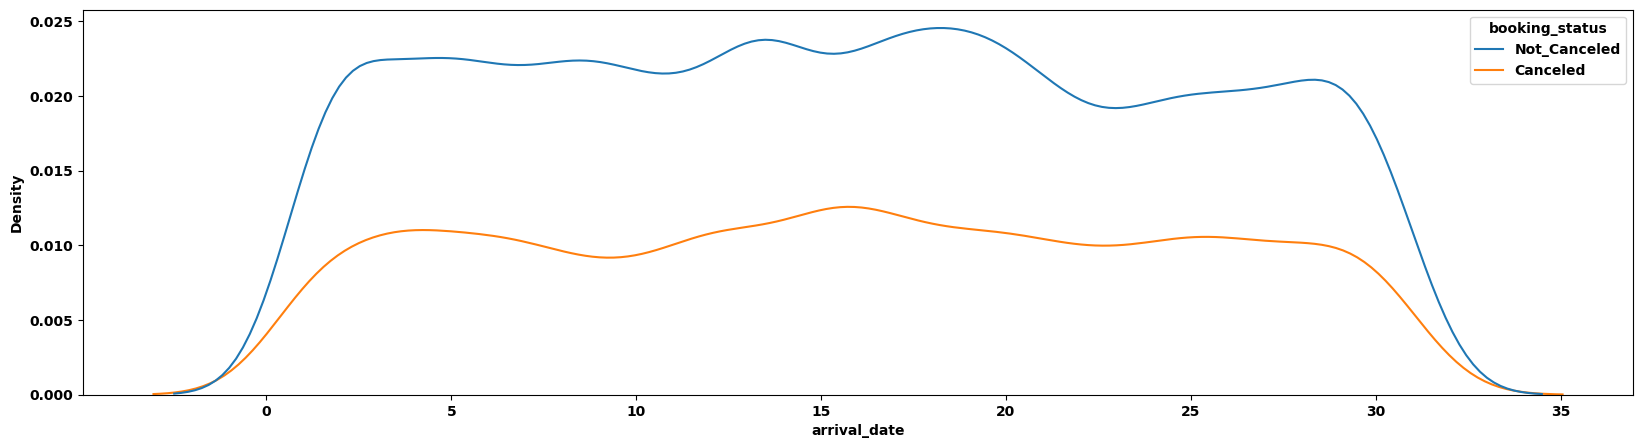

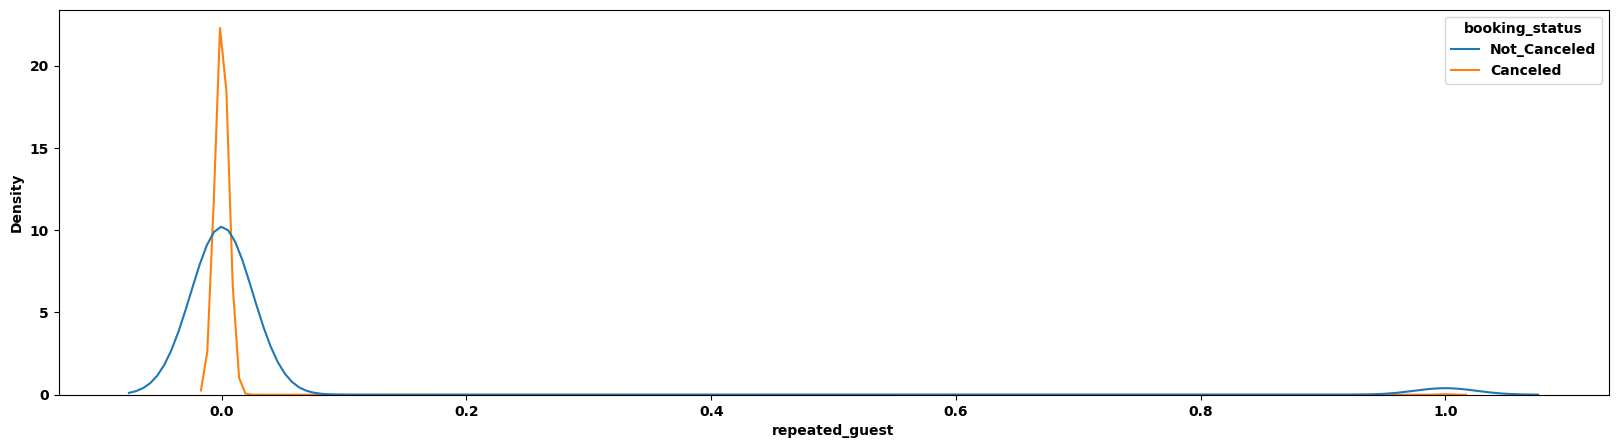

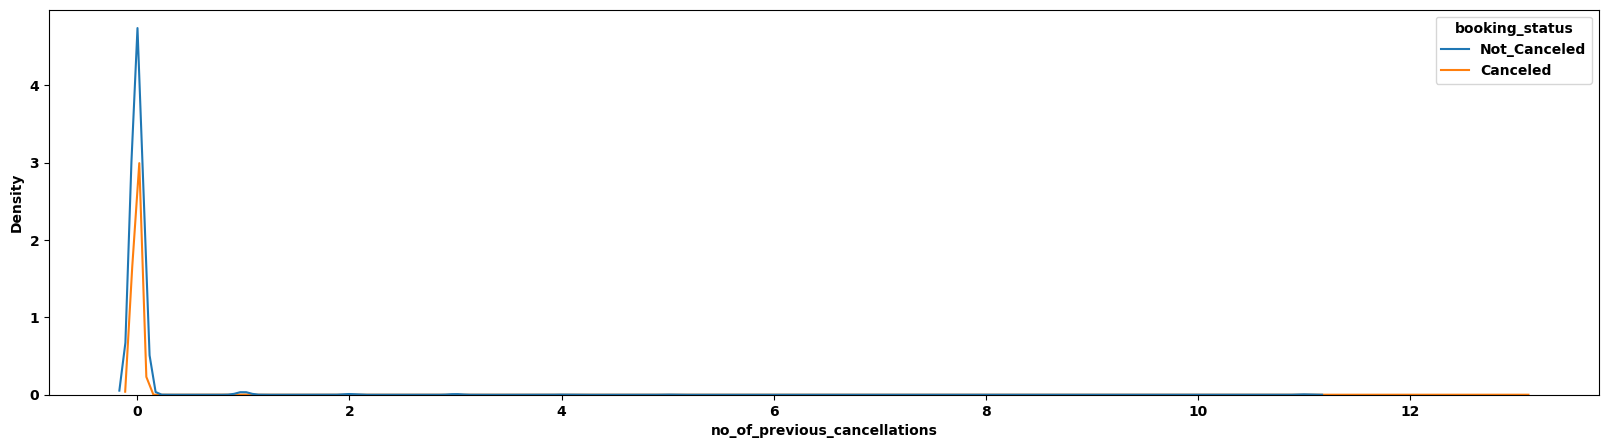

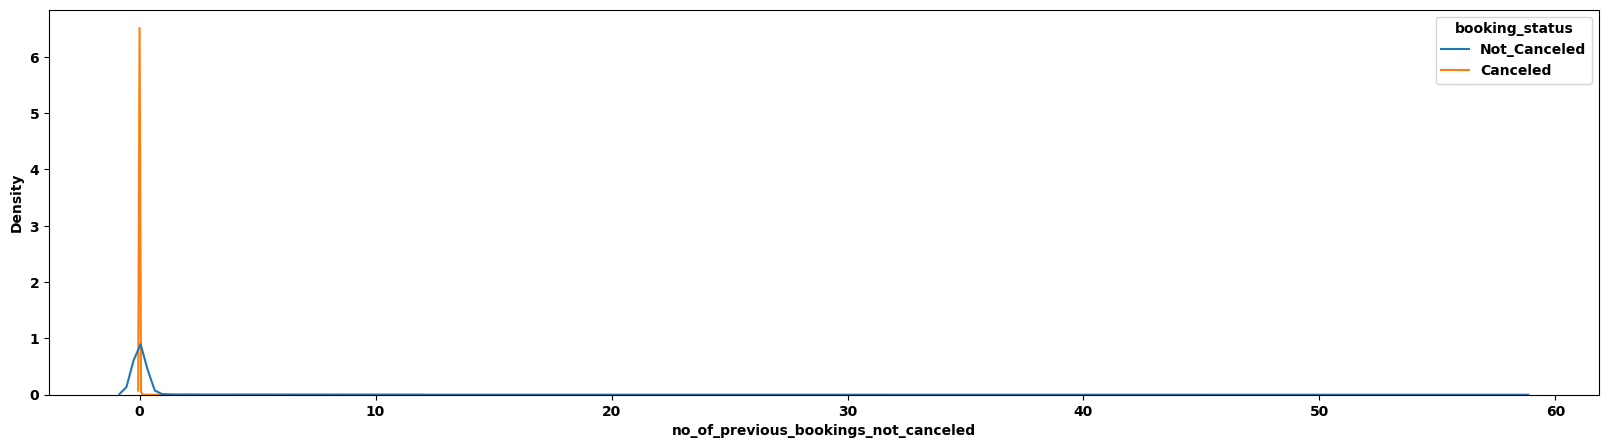

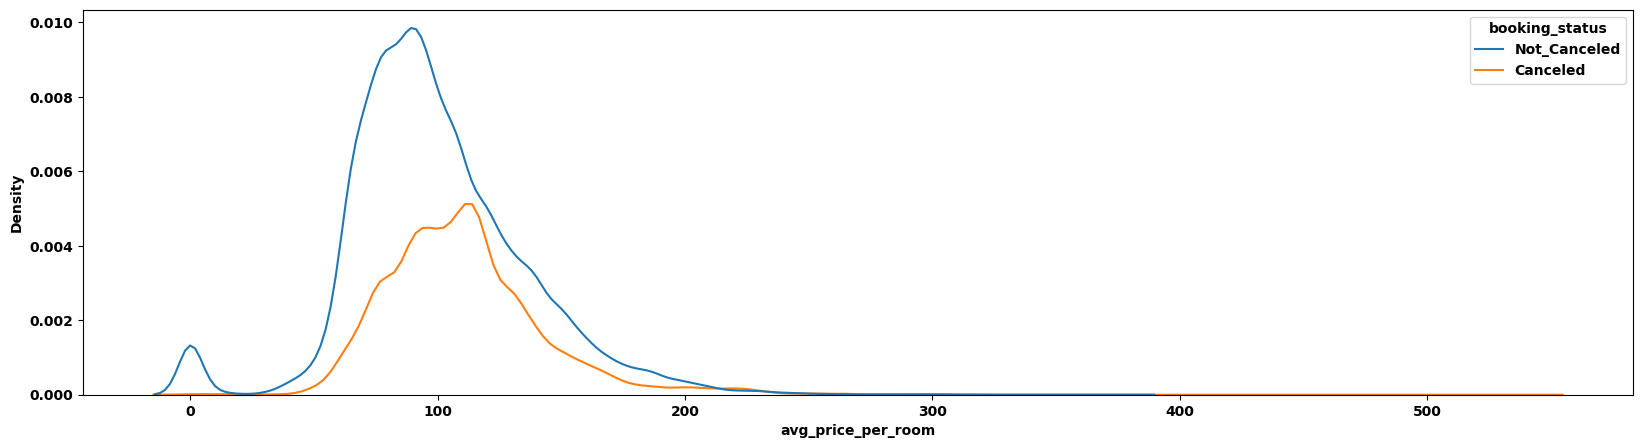

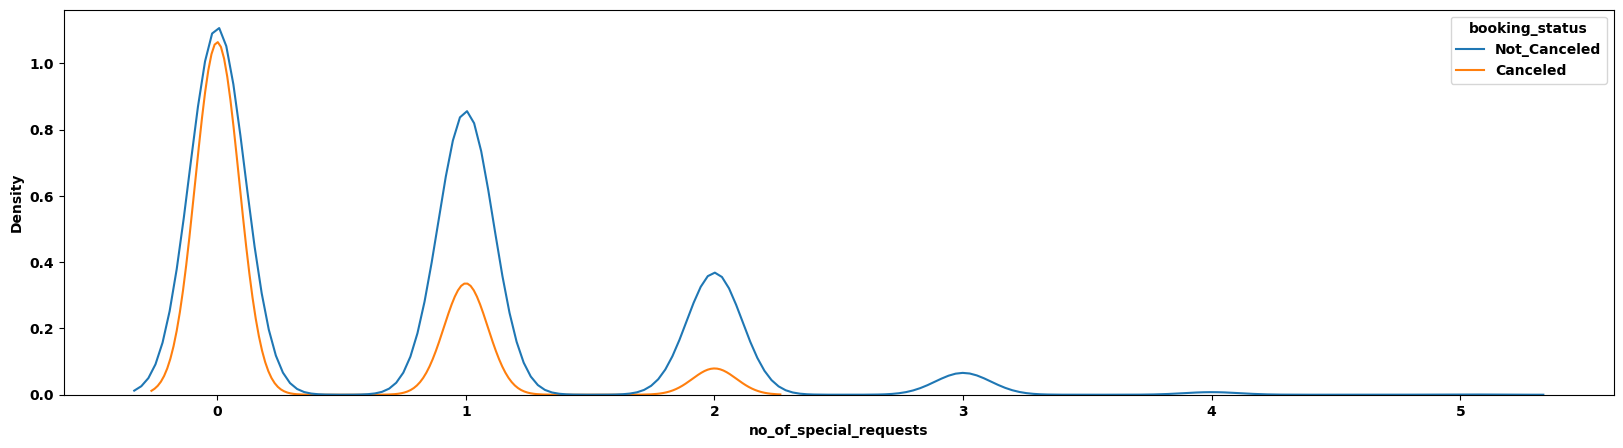

In [7]:
for col in columns_num:
    plt.figure(figsize=(20,5))
    sns.kdeplot(x = hotel[col], hue = hotel['booking_status'])
    plt.show()

'repeated_guest' is entered with values 0 and 1 and is listed as float64 type but I will convert it to Boolean typer for clarity.

In [8]:
# Convert 'repeated_guest' to Boolean type
hotel['repeated_guest'] = hotel['repeated_guest'].astype('bool')

type_of_meal_plan


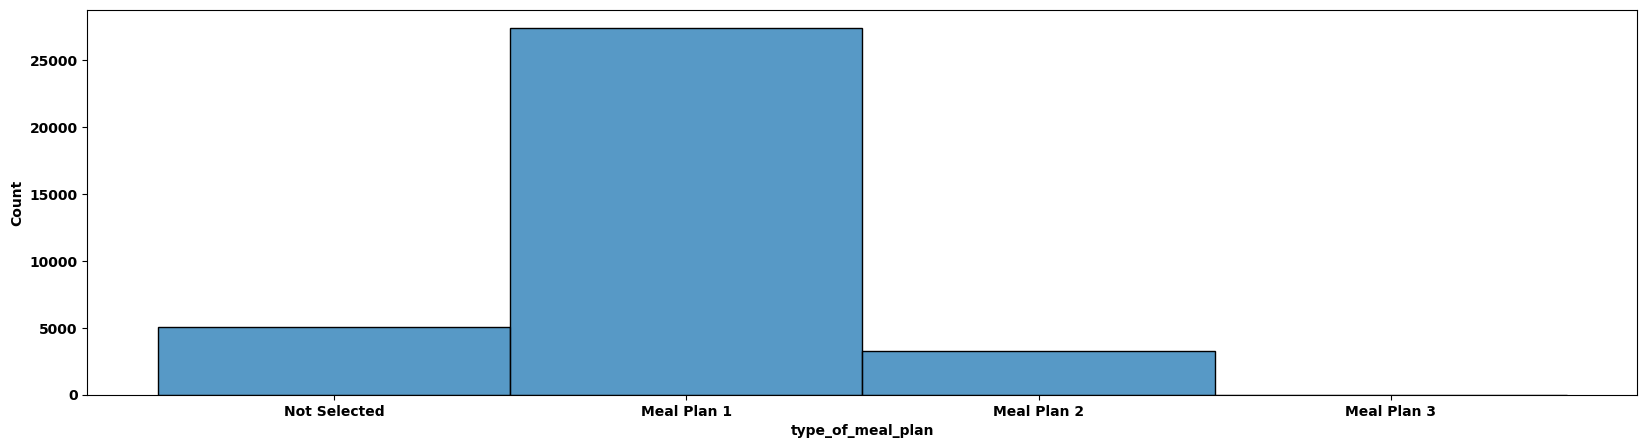

room_type_reserved


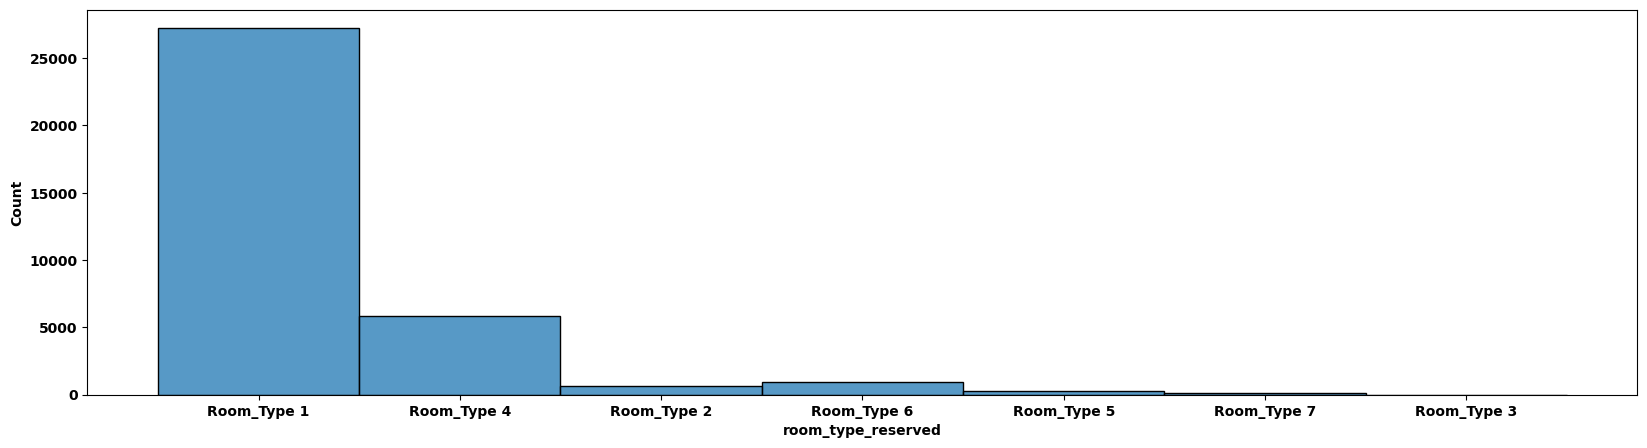

market_segment_type


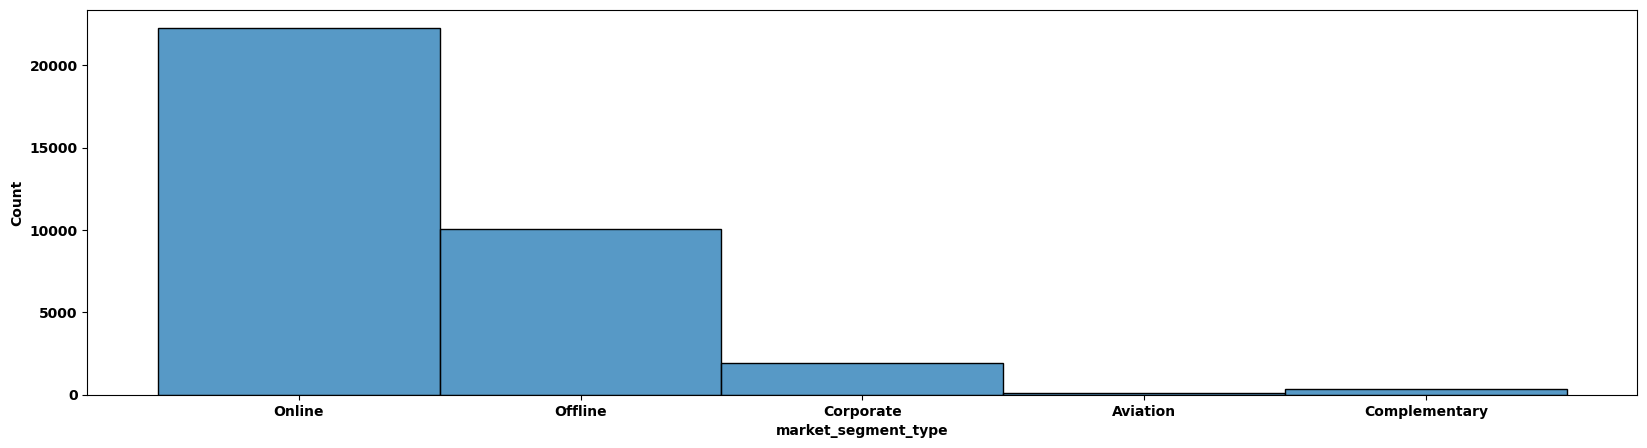

In [9]:
for col in columns_cat:
    print(col)
    plt.figure(figsize=(20,5))
    sns.histplot(hotel[col])
    plt.show()
    

## Feature Engineering

I start with addressing the issue with missing data that came up during the exploratory data analysis. There are no missing values in "Booking_ID" and "booking_status". The column 'required_parking_space' contains the highest number of missing values - 2592, which is 7% of the total data. Since the reasons for the missing data are unknown, I use Simple Imputer to fill the missing data. For numerical data I use the 'median' strategy and for categorical data I use the 'most_frequent' strategy.

In [10]:
# Impute missing numerical data with Scikit-learn’s Simple Imputer, strategy 'median'
median_imputer = SimpleImputer(strategy='median')
hotel[columns_num] = median_imputer.fit_transform(hotel[columns_num])

# Impute missing categorical data with Scikit-learn’s Simple Imputer, strategy 'most_frequent'
frequent_imputer = SimpleImputer(strategy = 'most_frequent')
hotel[columns_cat] = frequent_imputer.fit_transform(hotel[columns_cat])

I use value_counts() on the columns containing numerical data in order to explore the values in each column. I notice that the range of 'avg_price_per_room' is 0 - 540 and of 'lead_time' is 0 - 443 which are both very high. The ranges of the other numerical variables are smaller. I scale all the numerical values so that they lie between the same values. This ensures accurate and efficient model training and performance while reducing potential biases and inconsistencies that may arise from variations in their values. I use MinMaxScaler in order to scale all numerical values. This scales the features to lie between a given minimum and maximum value, for simplicity I will chose -1 and 1. There are no notable outliers in these numerical variables, except for no_of_children, where most values are <= 3 and only three rows contain data >=9. Thus, I remove those three rows.

In [11]:
# Display the possible values for 'no_of_children'
hotel['no_of_children'].value_counts()

no_of_children
0.0     33599
1.0      1605
2.0      1049
3.0        19
9.0         2
10.0        1
Name: count, dtype: int64

In [12]:
# Remove the rows with data >=9 for 'no_of_children' 
hotel = hotel[hotel['no_of_children']<9]

In [13]:
# Use MinMaxScaler() on numerical data
hotel['avg_price_per_room'] = MinMaxScaler().fit_transform(hotel['avg_price_per_room'].values.reshape(-1, 1))
hotel['lead_time'] = MinMaxScaler().fit_transform(hotel['lead_time'].values.reshape(-1, 1))
hotel['no_of_adults'] = MinMaxScaler().fit_transform(hotel['no_of_adults'].values.reshape(-1, 1))
hotel['no_of_children'] = MinMaxScaler().fit_transform(hotel['no_of_children'].values.reshape(-1, 1))
hotel['no_of_weekend_nights'] = MinMaxScaler().fit_transform(hotel['no_of_weekend_nights'].values.reshape(-1, 1))
hotel['no_of_week_nights'] = MinMaxScaler().fit_transform(hotel['no_of_week_nights'].values.reshape(-1, 1))
hotel['required_car_parking_space'] = MinMaxScaler().fit_transform(hotel['required_car_parking_space'].values.reshape(-1, 1))
hotel['arrival_year'] = MinMaxScaler().fit_transform(hotel['arrival_year'].values.reshape(-1, 1))
hotel['arrival_month'] = MinMaxScaler().fit_transform(hotel['arrival_month'].values.reshape(-1, 1))
hotel['no_of_previous_cancellations'] = MinMaxScaler().fit_transform(hotel['no_of_previous_cancellations'].values.reshape(-1, 1))
hotel['no_of_previous_bookings_not_canceled'] = MinMaxScaler().fit_transform(hotel['no_of_previous_bookings_not_canceled'].values.reshape(-1, 1))
hotel['no_of_special_requests'] = MinMaxScaler().fit_transform(hotel['no_of_special_requests'].values.reshape(-1, 1))

I will convert the columns containing categorical data ('type_of_meal_plan', 'room_type_reserved', 'market_segment_type') using one-hot encoding. This method creates a dummy variable for each value of the categorical feature, and a dummy variable is defined as a numerical variable with two values: 1 and 0.

In [14]:
hotel['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27944
Not Selected     5057
Meal Plan 2      3266
Meal Plan 3         5
Name: count, dtype: int64

There are only five rows containing the 'Meal Plan 3' which is a very small part of the data. Therefore, I will remove these rows.

In [15]:
# Remove rows containing Meal Plan 3
hotels = hotel[hotel['type_of_meal_plan'] != 'Meal Plan 3']

In [16]:
# One-hot encoding of type_of_meal_plan
dummies = pd.get_dummies(hotel['type_of_meal_plan'])
hotel = pd.concat([hotel, dummies], axis = 1)

In [17]:
hotel['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28404
Room_Type 4     5850
Room_Type 6      939
Room_Type 2      663
Room_Type 5      256
Room_Type 7      154
Room_Type 3        6
Name: count, dtype: int64

There are only six rows containing the 'Room_Type 3' which is a very small part of the data. Therefore, I will remove these rows.

In [18]:
hotel = hotel[hotel['room_type_reserved'] != 'Room_Type 3']

In [19]:
dummies = pd.get_dummies(hotel['room_type_reserved'])
hotel = pd.concat([hotel, dummies], axis = 1)

In [20]:
hotel['market_segment_type'].value_counts()

market_segment_type
Online           23772
Offline          10075
Corporate         1924
Complementary      373
Aviation           122
Name: count, dtype: int64

In [21]:
dummies = pd.get_dummies(hotel['market_segment_type'])
hotel = pd.concat([hotel, dummies], axis = 1)

I will convert the target valuable 'booking_status' to a Boolean variable in order to prepare it for the machine learning models.

In [22]:
# One-hot encoding for booking_status
dummies = pd.get_dummies(hotel['booking_status'])
hotel = pd.concat([hotel, dummies], axis = 1)

In [23]:
# Remove the columns that have become redundant
hotel.drop(columns = ['booking_status', 'Not_Canceled', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], inplace = True)

In [24]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36266 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36266 non-null  object 
 1   no_of_adults                          36266 non-null  float64
 2   no_of_children                        36266 non-null  float64
 3   no_of_weekend_nights                  36266 non-null  float64
 4   no_of_week_nights                     36266 non-null  float64
 5   required_car_parking_space            36266 non-null  float64
 6   lead_time                             36266 non-null  float64
 7   arrival_year                          36266 non-null  float64
 8   arrival_month                         36266 non-null  float64
 9   arrival_date                          36266 non-null  float64
 10  repeated_guest                        36266 non-null  float64
 11  no_of_previous_cance

The column 'Booking_ID' is dropped since it is only a unique indentifier for the booking and can thus not be used as a feature to predict the final booking status used as a target variable.

In [25]:
hotel = hotel.drop('Booking_ID', axis = 1)

I proceed with estimating the relevance of the features. I use several methods for this - correlation, mutual information and SelectKBest. I start with correlation and use a heatmap to illustrate the findings.

<Axes: >

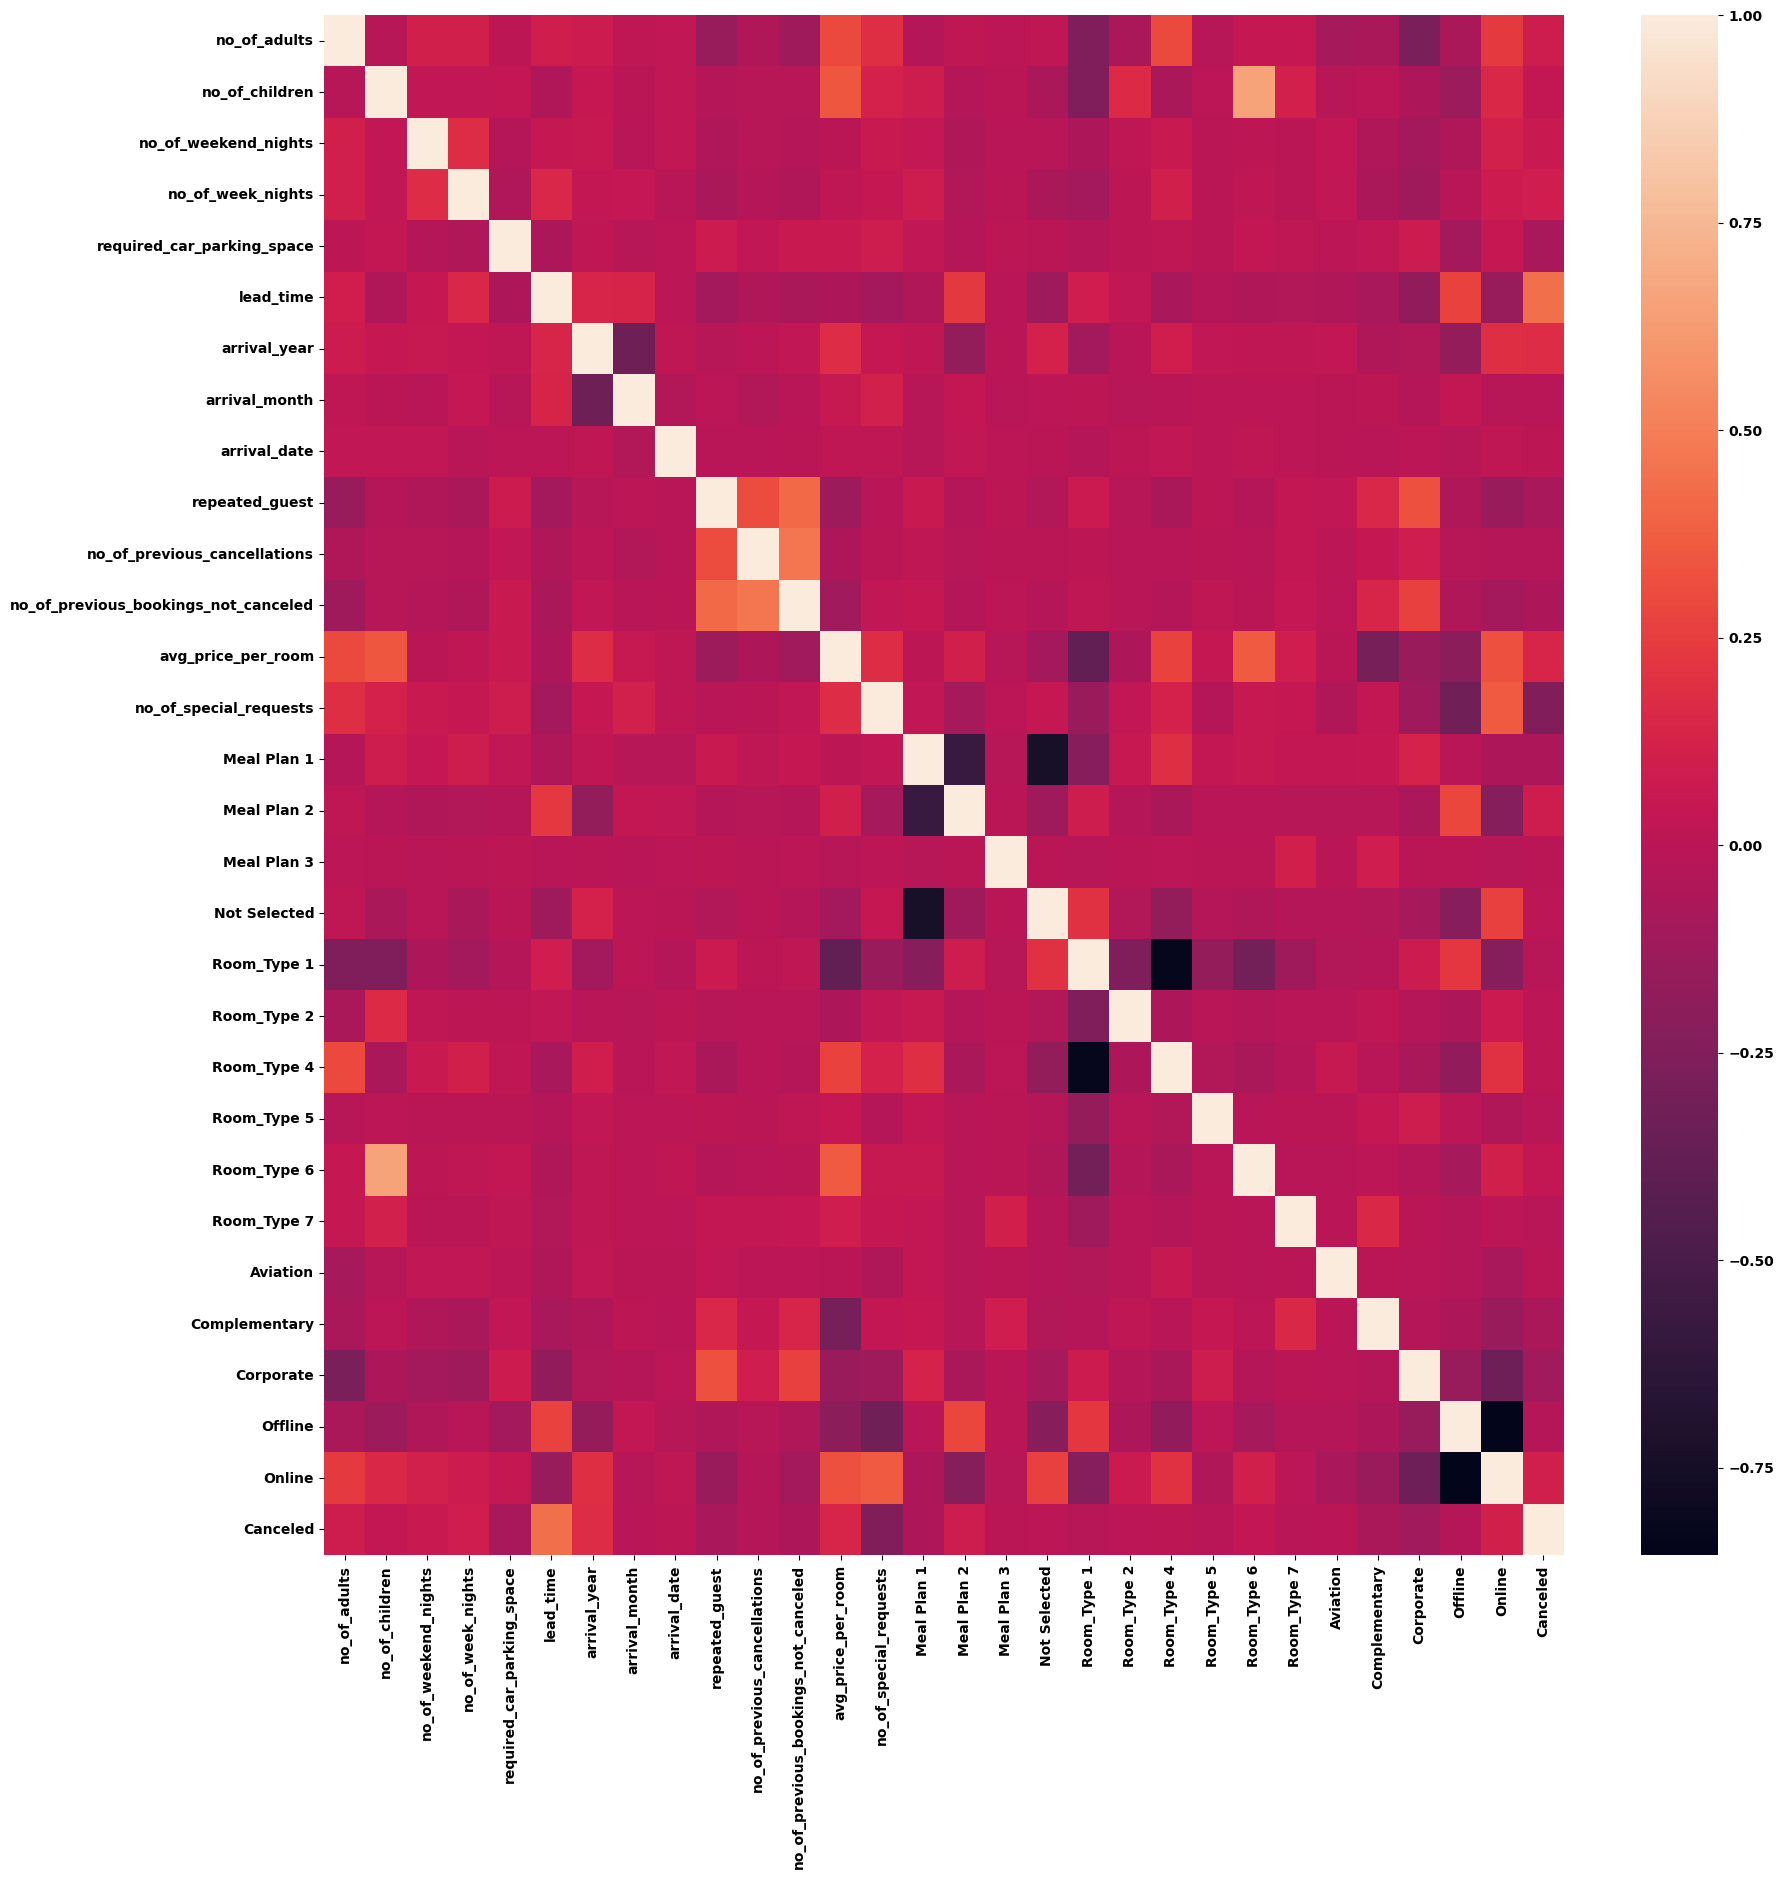

In [26]:
# Plot correlations using a heatmap
plt.figure(figsize = (20,20))
sns.heatmap(hotel.corr())

In [27]:
# Create a copy of the dataframe
X_y = hotel.copy()
y = X_y['Canceled']

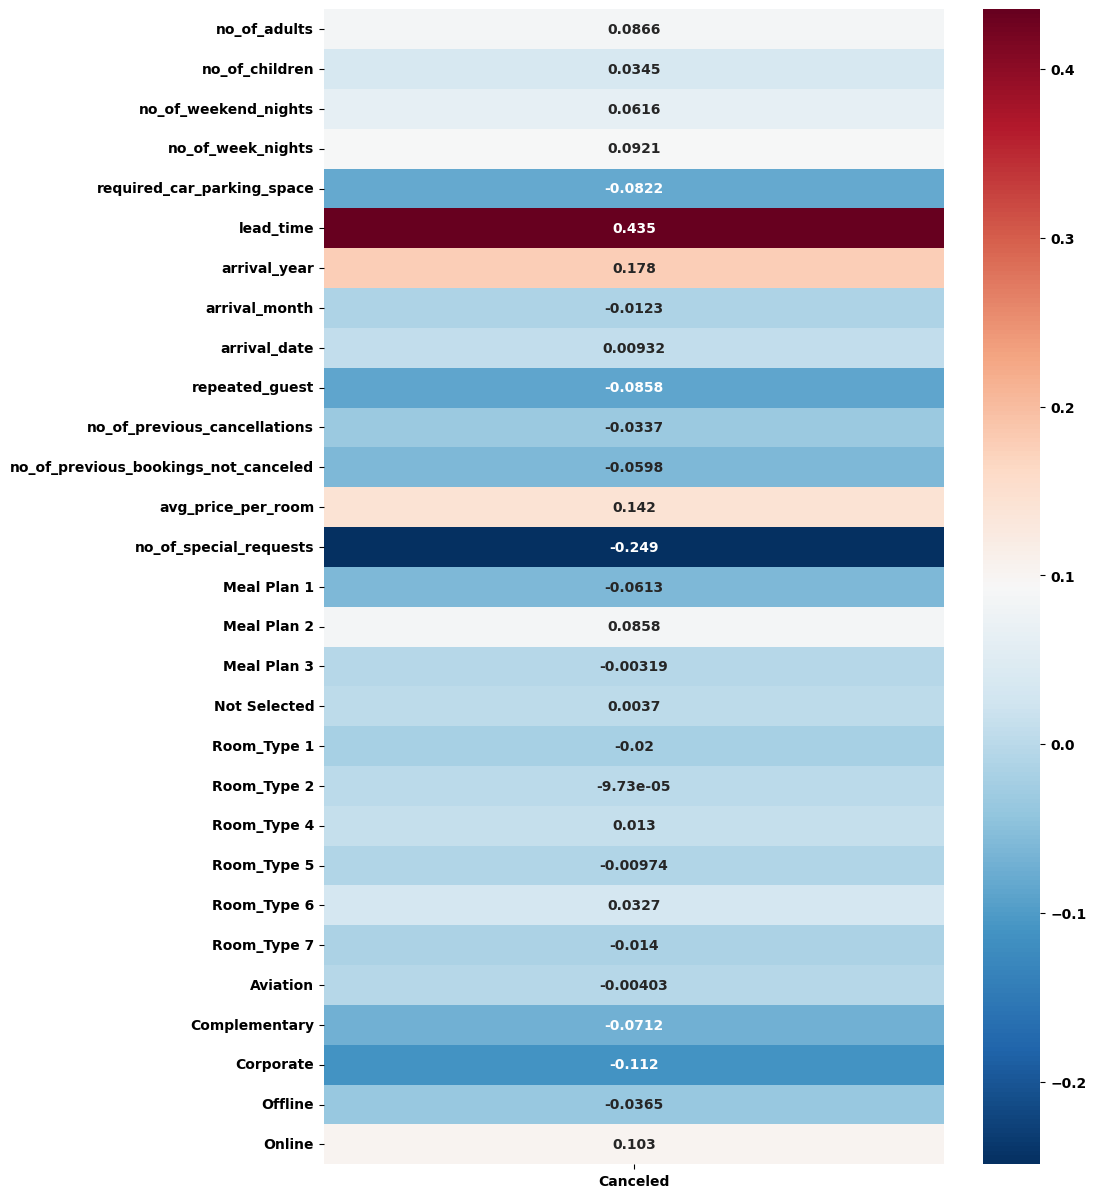

In [28]:
# Create a correlation matrix
corr_matrix = X_y.corr()
	 
# Isolate the column corresponding to `Canceled`
corr_target = corr_matrix[['Canceled']].drop(labels=['Canceled'])

plt.figure(figsize=(10,15))	 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()


If a feature is not very correlated with the target variable, such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially be filtered out. It seems that none of the features is strongly correlated with the target variable 'Canceled' so I will further explore the correlations and mutual information to rank and select the top features. 'arrival_date', 'Room_Type 2' and 'Room_Type 5' have especially low correlation coefficient so I exclude them.

In [29]:
# Exclude features with very low correlation coefficient
hotel = hotel.drop(['arrival_date', 'Room_Type 2', 'Room_Type 5'], axis = 1)

In [30]:
# Create a dataframe with all the features
X = hotel.drop('Canceled', axis = 1)

# Isolate the target variable
y = hotel['Canceled']

Next I use mutual information which is another filter method for ranking and selecting the top features. It is a measure of dependence between two variables and can be used to gauge how much a feature contributes to the prediction of the target variable. It is similar to Pearson’s correlation, but is not limited to detecting linear associations. 

In [31]:
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X, y, random_state=42)
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
hotel_norm_mic = X[high_score_features]
print(hotel_norm_mic.columns)

lead_time 0.13077447870720116
avg_price_per_room 0.0945574573812995
no_of_special_requests 0.03736944494893857
arrival_year 0.022805589290205486
arrival_month 0.019685574349642243
Online 0.015836735571505445
no_of_previous_bookings_not_canceled 0.009506282431142044
Complementary 0.008690259493300934
Corporate 0.008591289527978052
Room_Type 1 0.008370136378329285
Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_year', 'arrival_month', 'Online',
       'no_of_previous_bookings_not_canceled', 'Complementary', 'Corporate',
       'Room_Type 1'],
      dtype='object')


Finally, I use SelectKBest to pick out the top k features with the highest ranked scores. This method selects features that share the most mutual information with the target variable. I use chi2 score function as it is typically used for classification problems and computes chi-squared statistics between each feature and target.

In [32]:
threshold = 10  # the number of most relevant features
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(X, y)
sel_skb_index = sel_skb.get_support()
hotel_norm_skb = X.iloc[:, sel_skb_index]
print('p_values', sel_skb.pvalues_)
print(hotel_norm_skb.columns)

p_values [1.74096566e-003 3.91478016e-006 2.01638932e-005 6.32354312e-005
 1.14131908e-053 2.60411921e-292 2.11665832e-046 3.97483383e-001
 1.20390230e-057 1.78364245e-005 1.93483674e-011 6.95063103e-005
 1.13991280e-100 2.17919622e-008 9.70132827e-055 5.43138641e-001
 5.13449400e-001 7.64632249e-002 2.34664740e-002 8.09725781e-010
 7.96432219e-003 4.43633277e-001 2.00261409e-041 2.79911467e-095
 3.65090073e-009 1.74052828e-030]
Index(['required_car_parking_space', 'lead_time', 'arrival_year',
       'repeated_guest', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'Meal Plan 2', 'Complementary', 'Corporate',
       'Online'],
      dtype='object')


In [33]:
# Print the features that were selected by both mutual information and SelectKBest methods
for x in hotel_norm_mic:
    if x in hotel_norm_skb:
        print(x)

lead_time
no_of_special_requests
arrival_year
Online
no_of_previous_bookings_not_canceled
Complementary
Corporate


All three methods that I used in order to filter out the most relevant features show that lead_time is a potentially important feature for the model. There are no other strong conclusions I can draw at this point so I will proceed with building the machine learning models and further explore which are the best features that predict the target variable 'Canceled.'

## Machine Learning Models

I try out several types of machine learning models and finally present the ones that are performing the best in terms of accuracy, precision, recall and F1 scores. Since there is plenty of labeled data and the column describing whether a booking was canceled is of Boolean type, I use supervised machine learning algorithms for classification. I try several such algorithms and after evaluating them I decide to present the following:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Neural Network

#### Logistic Regression
Logistic regression is a supervised machine learning algorithm that predicts the probability (from 0 to 1), of a datapoint belonging to a specific category. These probabilities can then be used to assign observations to the more probable group. In this project this means that we are going to predict the probability (from 0 to 1) whether a booking is canceled or not.

I start with splitting the data into data for training and testing which will later help estimate the performance of the machine learning algorithms.

In [34]:
# Split the data into data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Fit the model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Estimate predictions on the test data
y_pred = logistic_regression_model.predict(X_test)

In [36]:
# Estimate the accuracy, precision, recall and F1 scores of the model
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
precision_logistic_regression = precision_score(y_test, y_pred)
recall_logistic_regression = recall_score(y_test, y_pred)
f1_logistic_regression = f1_score(y_test, y_pred)

score_models = pd.DataFrame([['Logistic Regression', accuracy_logistic_regression, precision_logistic_regression, recall_logistic_regression, f1_logistic_regression]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.795423,0.718191,0.59032,0.648008


In [37]:
# Print the coefficients for the features in the model
logistic_regression_model_features = pd.DataFrame(zip(X_train.columns, np.transpose(logistic_regression_model.coef_)), columns=['features', 'coef'])
print(logistic_regression_model_features.sort_values(by = ['coef']))

                                features                    coef
12                no_of_special_requests    [-6.914969995219934]
22                         Complementary   [-1.9273373033786005]
4             required_car_parking_space    [-1.491761355119306]
24                               Offline   [-1.0635603312580382]
20                           Room_Type 7   [-1.0084225984093176]
13                           Meal Plan 1   [-0.9751594233185161]
14                           Meal Plan 2    [-0.843508301058888]
16                          Not Selected   [-0.7077215557663202]
10  no_of_previous_bookings_not_canceled   [-0.6600789001570823]
7                          arrival_month  [-0.46139695654455515]
8                         repeated_guest   [-0.4450355301454975]
23                             Corporate   [-0.3627523822335087]
19                           Room_Type 6    [-0.348592308037157]
9           no_of_previous_cancellations  [-0.26274845424750254]
15                       

The logistic regression model has good accuracy (0.80) and precision (0.72) scores but lower recall (0.59) and f1 scores (0.65). There are several features which appear to be rather important in the model: avg_price_per_room, lead_time and no_of_special_requests have particularly high coefficients. There is potential for further tweaking and feature selection in order to improve the final accuracy, precision, recall and f1 scores of the model.

#### Decision Tree Classifier

A decision tree classifier is one of the easiest and most popular classification algorithms used to understand and interpret data. It is easy to interpret and visualize and can capture non-linear patterns.

In [38]:
# Fit the model
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

# Make predictions on the test data
decision_tree_pred = decision_tree.predict(X_test)

In [39]:
# Estimate the accuracy, precision, recall and F1 scores of the model
accuracy_decision_tree = accuracy_score(y_test, decision_tree_pred)
precision_decision_tree = precision_score(y_test, decision_tree_pred)
recall_decision_tree = recall_score(y_test, decision_tree_pred)
f1_decision_tree = f1_score(y_test, decision_tree_pred)

score_models = score_models._append({'Model': 'Decision Tree', 'Accuracy': accuracy_decision_tree, 'Precision': precision_decision_tree, 'Recall': recall_decision_tree, 'F1': f1_decision_tree}, ignore_index = True)
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.795423,0.718191,0.590320,0.648008
1,Decision Tree,0.857320,0.770173,0.787813,0.778893


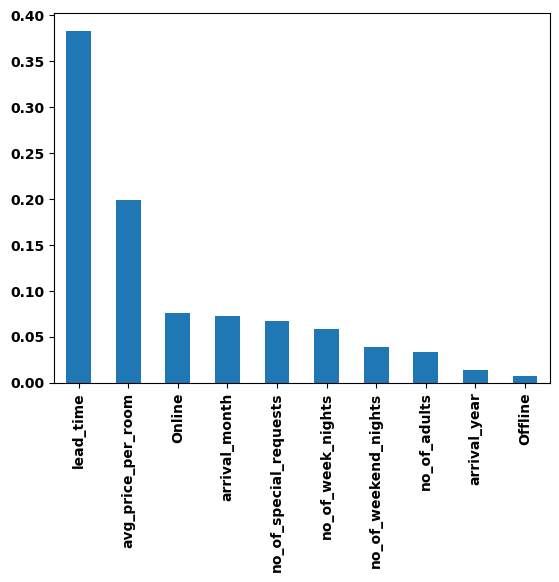

In [40]:
# Estimate the importance of the features in the decision tree model
decision_tree_feature_importance = pd.Series(decision_tree.feature_importances_, index = X.columns)
decision_tree_feature_importance.nlargest(10).plot(kind = 'bar')
plt.show()

The decision tree classifier performs even better than the logistic regression model in terms of logistic regression model has good accuracy (0.86 vs 0.80) and precision (0.77 vs 0.72), recall (0.79 vs 0.59) and f1 (0.78 vs 0.65) scores. Again, lead_time and avg_price_per_room seem to be of high importance in the model but no_of_special_requests is only in fifth place, closely following online and arrival_month.

#### Random Forest Classifier

The third machine learning model I build is a random forest classifier. This is an ensemble method, meaning that it combines predictions from other models that are decision trees. This means that there are multiple decision trees created using different random subsets of the data and features. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result.

In [41]:
# Fit the model
random_forest = RandomForestClassifier(criterion = 'gini', n_estimators = 3, random_state = 42, n_jobs = 5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, n_jobs=5, random_state=42)

In [42]:
# Make predictions on the test data
prediction_random_forest = random_forest.predict(X_test)

In [43]:
# Estimate the accuracy, precision, recall and F1 scores of the model
accuracy_random_forest = accuracy_score(y_test, prediction_random_forest)
precision_random_forest = precision_score(y_test, prediction_random_forest)
recall_random_forest = recall_score(y_test, prediction_random_forest)
f1_random_forest = f1_score(y_test, prediction_random_forest)

score_models = score_models._append({'Model': 'Random forest', 'Accuracy': accuracy_random_forest, 'Precision': precision_random_forest, 'Recall': recall_random_forest, 'F1': f1_random_forest}, ignore_index = True)
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.795423,0.718191,0.590320,0.648008
1,Decision Tree,0.857320,0.770173,0.787813,0.778893
2,Random forest,0.868211,0.797025,0.787381,0.792174


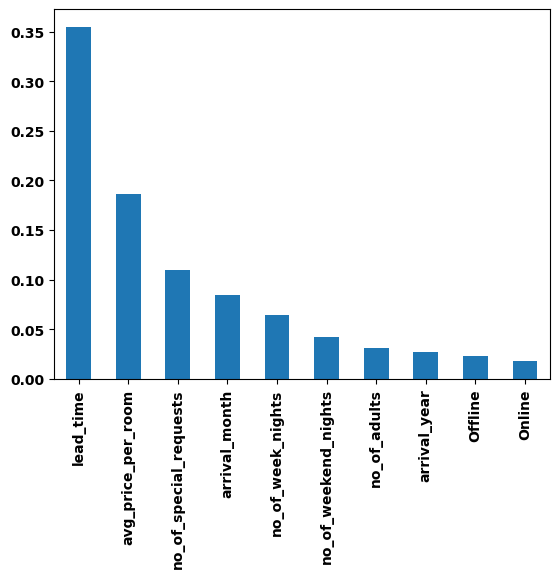

In [44]:
# Estimate the importance of the features in the random forest model
random_forest_feature_importance = pd.Series(random_forest.feature_importances_, index = X.columns)
random_forest_feature_importance.nlargest(10).plot(kind = 'bar')
plt.show()

Compared to the decision tree model, the random forest model performs similarly in terms of accuracy, precision, recall and F1 scores. Once again, lead_time and avg_price_per_room seem to be the most important features and this time they are followed by no_of_special_requests.

#### Neural Network

The final machine learning model I build is a neural network. I build a sequential model and use the activation functions 'relu' and 'softmax'. I experiment with tweaking the model using different methods and below is the final model I use.

In [45]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
# Create model
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

In [47]:
# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Fit model
model.fit(X_train, y_train, epochs = 50, batch_size=400, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7024 - loss: 0.5722 - val_accuracy: 0.6810 - val_loss: 0.6304
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7941 - loss: 0.4620 - val_accuracy: 0.6810 - val_loss: 0.6047
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8033 - loss: 0.4259 - val_accuracy: 0.6810 - val_loss: 0.5673
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8107 - loss: 0.4085 - val_accuracy: 0.6945 - val_loss: 0.5321
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8194 - loss: 0.3935 - val_accuracy: 0.7366 - val_loss: 0.5103
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8167 - loss: 0.3933 - val_accuracy: 0.7725 - val_loss: 0.4643
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8253 - loss: 0.3833 - val_accuracy: 0.8042 - val_loss: 0.4297
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8286 - loss: 0.3770 - val_accuracy: 0.8183 - v

In [48]:
# Calculate the finall loss value
print('Final loss value:', model.evaluate(X_train, y_train))

907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8726 - loss: 0.2831
Final loss value: [0.2833757698535919, 0.8726388812065125]


In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: ', accuracy)

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8569 - loss: 0.3191
Accuracy:  0.8578715324401855


The accuracy of the neural network I just built is similar to the accuracy of the decision tree and random forest models. Still, there are possibilities to decrease the final loss value. Since this is just an exercise and I aim to focus more on models that are easier to interpret, I will leave the neural network as it is.

All four machine learning models I built have a good accuracy score. Deciding which model to use depends on numerous factors, including the interpretability of the model. The decision tree model is more straightforward and easy to understand than the neural network. There are also other factors to consider, including if there is possibilty to collect additional data, what is the explanation about missing values, etc. Finally, this was just an exercise for me to build machine learning models and for simplicity I didn't deep dive into different normalization, didn't apply regularization or other techniques. Still, the machine learning models I presented are a good starting point for future research.